In [17]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
import matplotlib.pyplot as plt


In [18]:
num_of_nodes = 1000

# Barabási-Albert
num_of_edges = 5
ba_graph = nx.barabasi_albert_graph(num_of_nodes, num_of_edges)
ba_model = ep.SIRModel(ba_graph)

# Watts-Strogatz
k_nearest_neighbors = 6
rewiring_probability = 0.1
ws_graph = nx.watts_strogatz_graph(num_of_nodes, k_nearest_neighbors, rewiring_probability)
ws_model = ep.SIRModel(ws_graph)

# Erdős-Rényi
edge_creation_probability = 0.1
er_graph = nx.erdos_renyi_graph(num_of_nodes, edge_creation_probability)
er_model = ep.SIRModel(er_graph)

In [23]:
# Parameters to vary
betas = [0.05, 0.1, 0.3]
gammas = [0.005, 0.1]

results = {}

for beta in betas:
    for gamma in gammas:
        config = mc.Configuration()
        config.add_model_parameter('beta', beta)
        config.add_model_parameter('gamma', gamma)
        config.add_model_initial_configuration("Infected", [i for i in range(int(0.1*1000))]) # 1% initially infected

        for graph, name in [(ba_graph, "Barabási-Albert"), (ws_graph, "Watts-Strogatz"), (er_graph, "Erdős-Rényi")]:
            model = ep.SIRModel(graph)
            model.set_initial_status(config)
            iterations = model.iteration_bunch(200)
            
            # Store results
            key = (name, beta, gamma)
            results[key] = iterations

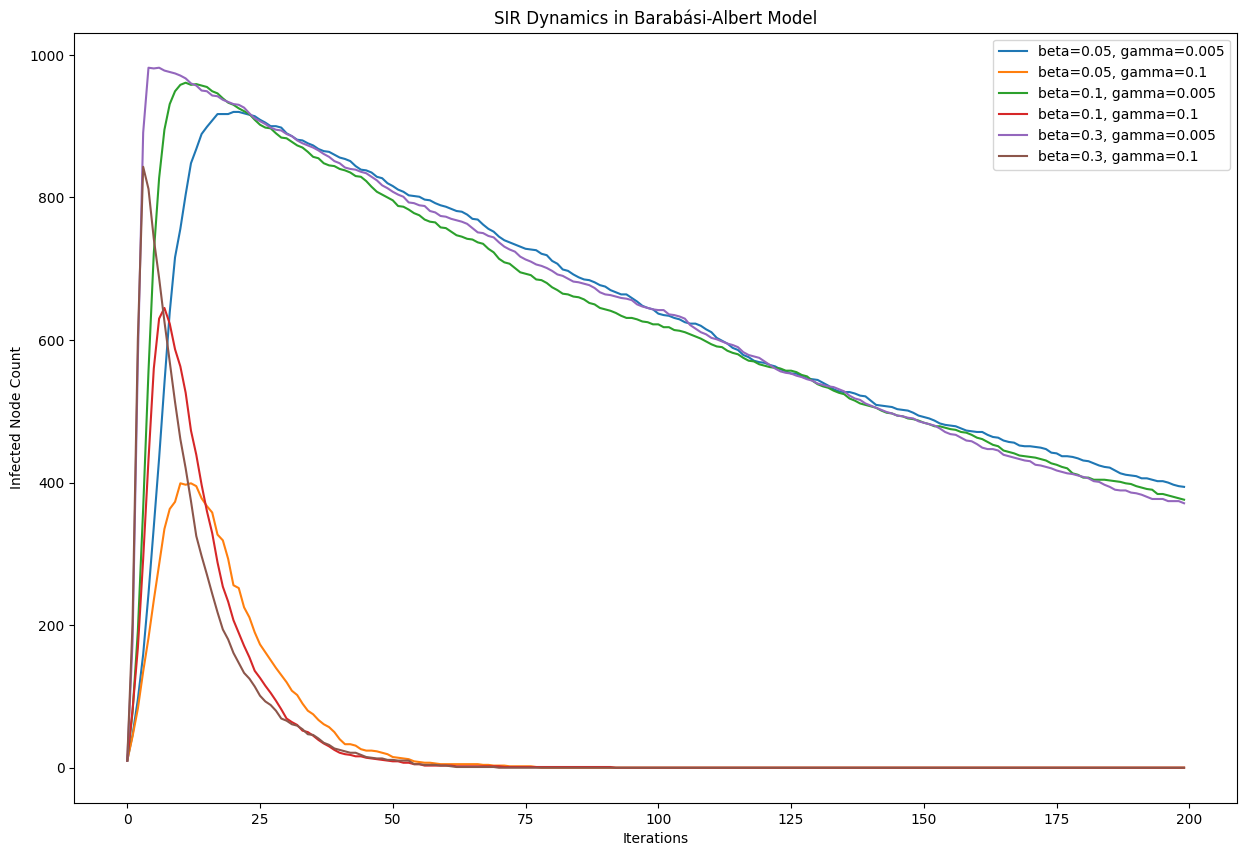

In [24]:
name = "Barabási-Albert"
plt.figure(figsize=(15, 10))

for beta in betas:
    for gamma in gammas:
        key = (name, beta, gamma)
        infected = [it['node_count'][1] for it in results[key]]
        plt.plot(infected, label=f"beta={beta}, gamma={gamma}")

plt.title(f"SIR Dynamics in {name} Model")
plt.xlabel("Iterations")
plt.ylabel("Infected Node Count")
plt.legend()
plt.show()

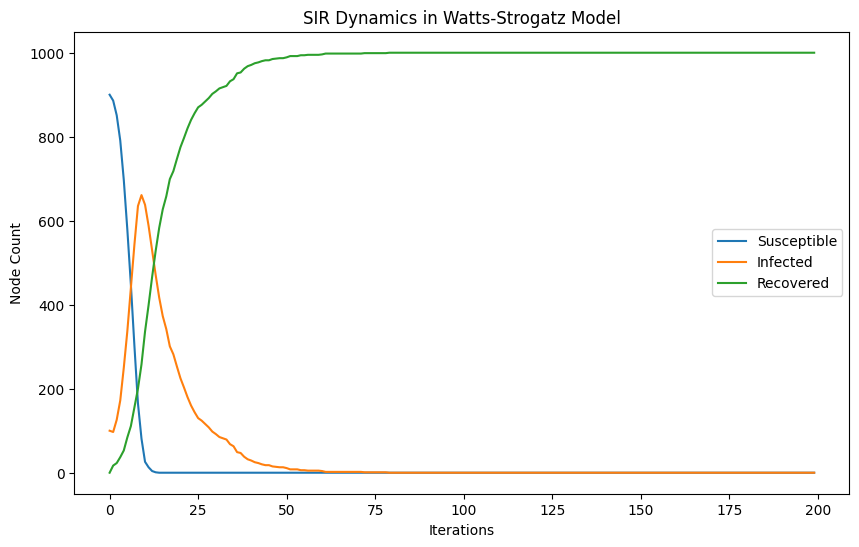

In [21]:
# Extract SIR dynamics for Watts-Strogatz model
ws_susceptible = [it['node_count'][0] for it in ws_iterations]
ws_infected = [it['node_count'][1] for it in ws_iterations]
ws_recovered = [it['node_count'][2] for it in ws_iterations]

# Plotting the Watts-Strogatz model dynamics
plt.figure(figsize=(10, 6))
plt.plot(ws_susceptible, label="Susceptible")
plt.plot(ws_infected, label="Infected")
plt.plot(ws_recovered, label="Recovered")
plt.title("SIR Dynamics in Watts-Strogatz Model")
plt.xlabel("Iterations")
plt.ylabel("Node Count")
plt.legend()
plt.show()

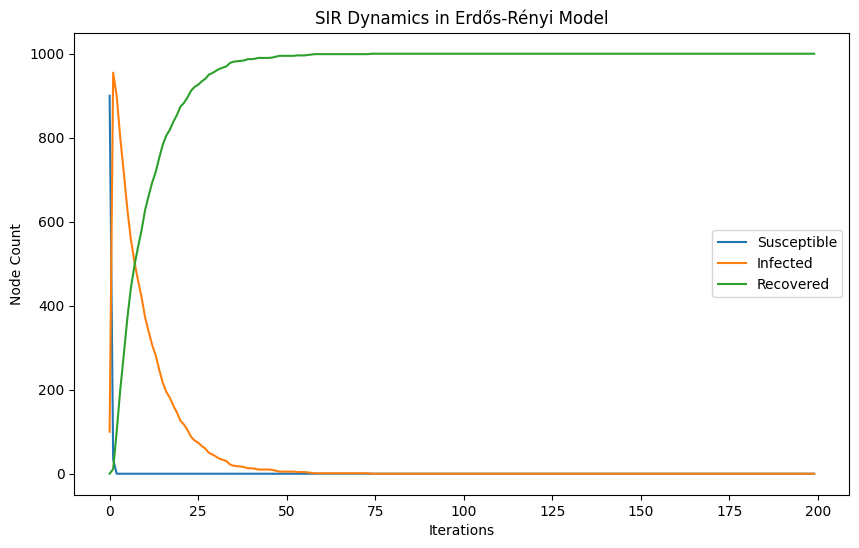

In [22]:
# Extract SIR dynamics for Erdős-Rényi model
er_susceptible = [it['node_count'][0] for it in er_iterations]
er_infected = [it['node_count'][1] for it in er_iterations]
er_recovered = [it['node_count'][2] for it in er_iterations]

# Plotting the Erdős-Rényi model dynamics
plt.figure(figsize=(10, 6))
plt.plot(er_susceptible, label="Susceptible")
plt.plot(er_infected, label="Infected")
plt.plot(er_recovered, label="Recovered")
plt.title("SIR Dynamics in Erdős-Rényi Model")
plt.xlabel("Iterations")
plt.ylabel("Node Count")
plt.legend()
plt.show()